**INTRODUCTION/EXECUTIVE SUMMARY**

*   What the project about (talk about the datasets)
*   What the report does (examine the data, find any patterns and potentially come up with a prediction model)



**DATA PREPARATION**

*   Though originally intended to learn about the relationship only between screentime and well-being indicators, the progress has revealed that screentime maybe not the only factor.
=> Thus, merge all dataset 1,2 and 3. (We want to do analysis on all the participants who conveyed both surveys for screen time and well-being to improve accuary). Mention the use of inner merge on common identifier 'ID'
*   Mention how many records in each dataset:
  *   How many people recorded in total
  *   How many people filled out screen time survey
  *   How many people filled out well-being survey


In [1]:
# Load the Drive helper and mount
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive') # mounts the Google Drive at the specified location making it accessible
cd = '/content/drive/My Drive/hit140_datasets'
os.chdir(cd)

#Import Pandas
import pandas as pd

#Read the datasets into DataFrames
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')
df3 = pd.read_csv('dataset3.csv')

#Merge the Datasets
df_merged = pd.merge(df1,df2, on='ID', how = 'inner') # merge on 'ID'
df_merged = pd.merge(df_merged,df3, on='ID',how = 'inner') # merge on 'ID'

# Count the number of records in each dataset
count_df1 = df1.shape[0]  # Dataset 1 (Demographics)
count_df2 = df2.shape[0]  # Dataset 2 (Screen Time)
count_df3 = df3.shape[0]  # Dataset 3 (Well-being)

# Count the number of records in the merged dataset
count_merge = df_merged.shape[0]

# Print the results
print("Number of records in Dataset 1 (Demographics):", count_df1)
print("Number of records in Dataset 2 (Screen Time):", count_df2)
print("Number of records in Dataset 3 (Well-being):", count_df3)
print("Number of records in the Merged Dataset:", count_merge)


Mounted at /content/drive
Number of records in Dataset 1 (Demographics): 120115
Number of records in Dataset 2 (Screen Time): 113359
Number of records in Dataset 3 (Well-being): 102580
Number of records in the Merged Dataset: 98278


**DATA EXPLORATORY ANALYSIS**
1.   Descriptive Analysis


*   Briefly describe participants demographics (gender, minority, deprivation). How much percentage of male, female, minority, non-minority, ... .

*   Comment about observations for each types of variables (screentime and well-being)
*   Put the code outcome in 2 tables, remove a few unnecessary stats (count, min, max)
*   Give observations: (example summary generated by chatGPT, might remove some less important feature):

**Well-being Variables:**

Central Tendency (Mean, Median, Mode):

  Most well-being indicators have mean values around 3 (moderate well-being) with slight variation.

  The median (50% quartile) is also close to 3 for most variables, indicating that half of the respondents rate their well-being in the moderate range.

  The mode (most frequent value) is mostly 3 or 4, showing a tendency towards moderate-to-high well-being for most respondents.

Spread (Standard Deviation, Variance):

  The standard deviation ranges from 0.95 to 1.13 across variables, indicating moderate spread around the mean. The variance values reflect similar moderate variability in responses.

  Variables like Goodme (feeling good about oneself) and Conf (confidence) show slightly higher variability compared to others.


Specific Variables:
  Loved (feeling loved) and Mkmind (able to make up one's mind) show slightly higher means (3.85-3.9), indicating that respondents generally report positive feelings in these areas.

  Engs (having energy) and Relx (feeling relaxed) have lower mean values (around 3), showing that respondents report less positive experiences in these areas.


**Screen Time Variables:**

Central Tendency (Mean, Median, Mode):

  Smartphone usage (S_we, S_wk) has the highest mean values (3.5 on weekends and 2.89 on weekdays), indicating it is the most frequently used device.

  Video game usage (G_we, G_wk) and computer usage (C_we, C_wk) are lower, with many respondents reporting zero hours (mode = 0 for G_we, G_wk, C_wk).

  TV usage (T_we, T_wk) shows moderate use, with a mean of 3.65 hours on weekends and 2.55 on weekdays.

Spread (Standard Deviation, Variance):

  Smartphone usage (S_we) has the largest spread (standard deviation of 2.49 and variance of 6.20), indicating significant variability in how much respondents use smartphones.

  TV usage also shows notable variability, with some respondents reporting high levels of usage (max of 7 hours).

  Video game usage exhibits high variability on weekends (variance of 4.66), indicating that some respondents play extensively, while many don't play at all.

Specific Variables:

  TV usage (T_we, T_wk) is relatively moderate with a mean close to 4 on weekends and 2.55 on weekdays, indicating that it's a common leisure activity.
  Video game usage is the most skewed, especially during the weekdays (mean = 1.00, skewness = 1.85), with many respondents reporting no usage and a few reporting high levels of gaming.

**Summary:**

Well-being variables generally show moderate-to-high levels of well-being, with respondents feeling especially positive about social aspects like feeling loved and being able to make decisions. Energy levels and relaxation seem to be slightly lower.
Screen time variables reveal that smartphone usage dominates, followed by TV watching, while video gaming and computer usage vary significantly among respondents, with many reporting no usage.
The skewness in both types of variables shows that while moderate values are common, there are respondents with very high screen time and high well-being, though outliers exist on both ends.

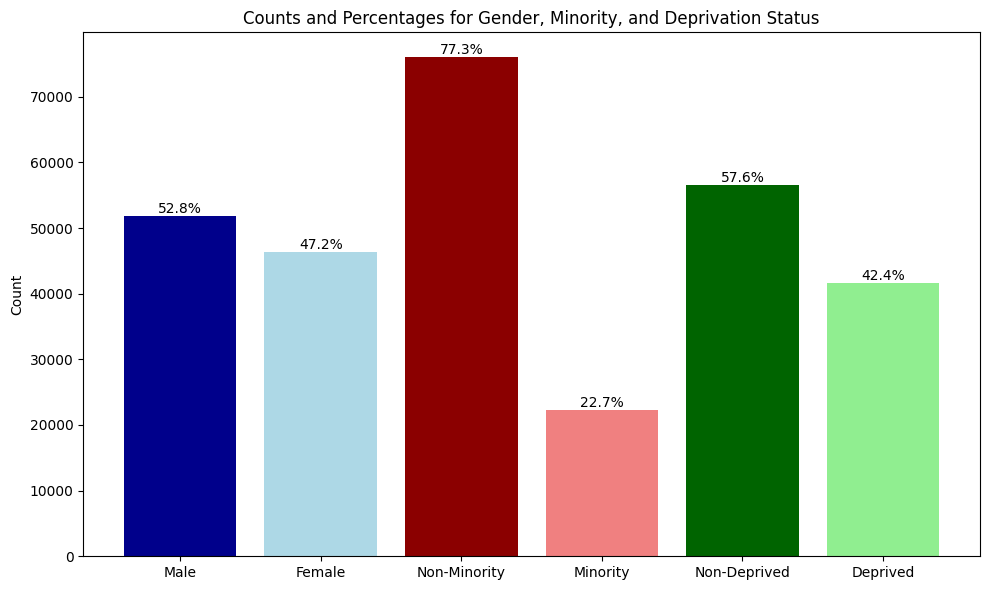

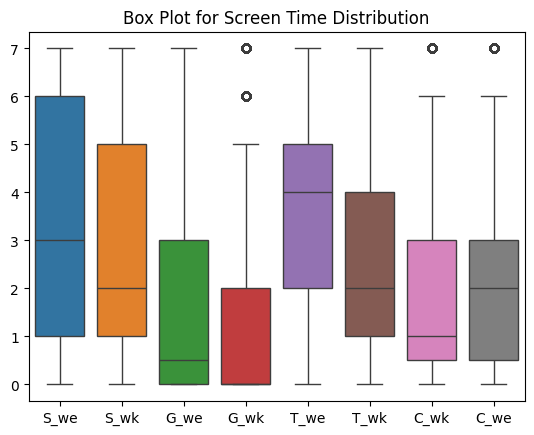

In [2]:
# Import necessary libraries
import pandas as pd

# Descriptive statistics for screen time variables
screen_time_stats = df_merged[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].describe()

# Add missing descriptive statistics
# Mode
screen_time_mode = df_merged[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].mode().iloc[0]
# Variance
screen_time_variance = df_merged[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].var()
# Skewness
screen_time_skewness = df_merged[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].skew()


# Add the new statistics to the screen_time_stats dataframe
screen_time_stats.loc['mode'] = screen_time_mode
screen_time_stats.loc['variance'] = screen_time_variance
screen_time_stats.loc['skewness'] = screen_time_skewness

# Round the statistics to 2 decimal places
screen_time_stats = screen_time_stats.round(2)
# Display the extended statistics
print("Comprehensive Descriptive Statistics for Screen Time Variables:")
print(screen_time_stats)


Comprehensive Descriptive Statistics for Screen Time Variables:
              C_we      C_wk      G_we      G_wk      S_we      S_wk  \
count     98278.00  98278.00  98278.00  98278.00  98278.00  98278.00   
mean          2.20      1.77      1.73      1.00      3.50      2.89   
std           2.07      1.72      2.16      1.54      2.49      2.33   
min           0.00      0.00      0.00      0.00      0.00      0.00   
25%           0.50      0.50      0.00      0.00      1.00      1.00   
50%           2.00      1.00      0.50      0.00      3.00      2.00   
75%           3.00      3.00      3.00      2.00      6.00      5.00   
max           7.00      7.00      7.00      7.00      7.00      7.00   
mode          1.00      1.00      0.00      0.00      7.00      2.00   
variance      4.28      2.97      4.66      2.37      6.20      5.41   
skewness      0.93      1.30      1.14      1.85      0.13      0.54   

              T_we      T_wk  
count     98278.00  98278.00  
mean     

In [3]:
# Descriptive statistics for well-being variables
well_being_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Calculate descriptive statistics using .describe()
well_being_stats = df_merged[well_being_columns].describe()

# Calculate mode, range, variance, skewness, and kurtosis
well_being_mode = df_merged[well_being_columns].mode().iloc[0]
well_being_variance = df_merged[well_being_columns].var()
well_being_skewness = df_merged[well_being_columns].skew()

# Add new statistics to the stats dataframe
well_being_stats.loc['mode'] = well_being_mode
well_being_stats.loc['variance'] = well_being_variance
well_being_stats.loc['skewness'] = well_being_skewness

# Round
well_being_stats = well_being_stats.round(2)

# Display the comprehensive well-being statistics
print("Comprehensive Descriptive Statistics for Well-being Variables:")
print(well_being_stats)


Comprehensive Descriptive Statistics for Well-being Variables:
              Optm      Usef      Relx      Intp      Engs    Dealpr  \
count     98278.00  98278.00  98278.00  98278.00  98278.00  98278.00   
mean          3.28      3.11      3.10      3.27      3.05      3.37   
std           1.00      0.95      1.01      1.02      1.08      1.05   
min           1.00      1.00      1.00      1.00      1.00      1.00   
25%           3.00      3.00      2.00      3.00      2.00      3.00   
50%           3.00      3.00      3.00      3.00      3.00      3.00   
75%           4.00      4.00      4.00      4.00      4.00      4.00   
max           5.00      5.00      5.00      5.00      5.00      5.00   
mode          3.00      3.00      3.00      4.00      3.00      4.00   
variance      0.99      0.91      1.03      1.03      1.16      1.10   
skewness     -0.29     -0.19     -0.07     -0.35     -0.06     -0.42   

            Thcklr    Goodme     Clsep      Conf    Mkmind     Loved  \


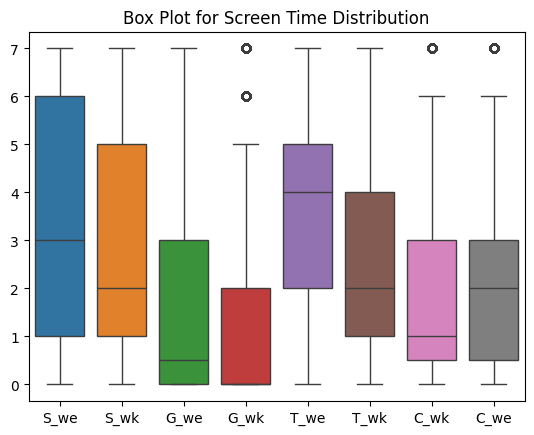

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_merged[['S_we', 'S_wk', 'G_we', 'G_wk', 'T_we', 'T_wk','C_wk','C_we']])
plt.title("Box Plot for Screen Time Distribution")
plt.show()


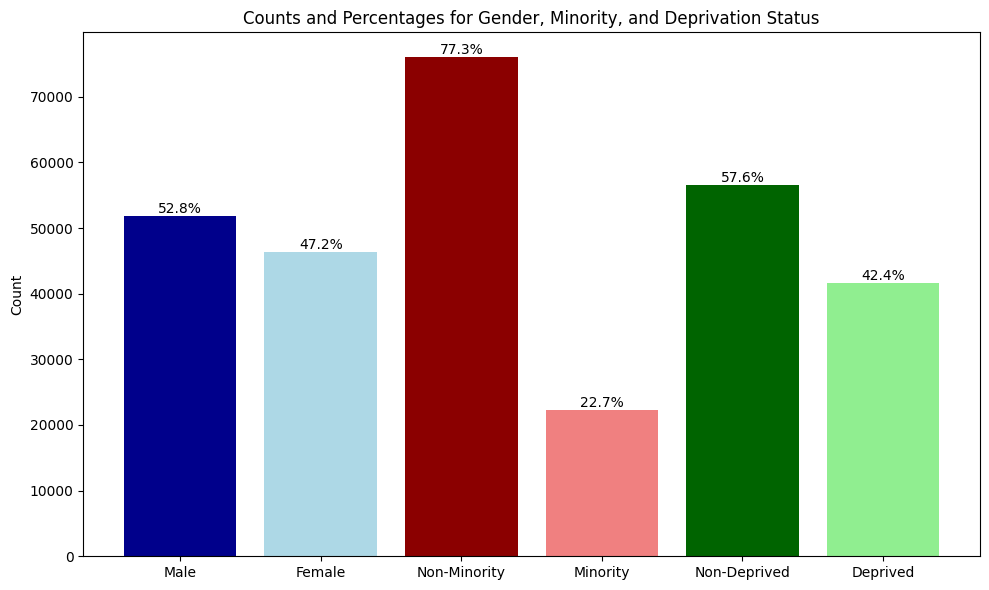

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Count gender, minority, and deprivation groups
gender_counts = df_merged['gender'].value_counts()
minority_counts = df_merged['minority'].value_counts()
deprived_counts = df_merged['deprived'].value_counts()

# Convert counts to percentages
gender_percentages = (gender_counts / gender_counts.sum()) * 100
minority_percentages = (minority_counts / minority_counts.sum()) * 100
deprived_percentages = (deprived_counts / deprived_counts.sum()) * 100

# Create a combined dataframe for plotting
data = pd.DataFrame({
    'Count': [gender_counts[0], gender_counts[1], minority_counts[0], minority_counts[1], deprived_counts[0], deprived_counts[1]],
    'Percentage': [gender_percentages[0], gender_percentages[1], minority_percentages[0], minority_percentages[1], deprived_percentages[0], deprived_percentages[1]],
    'Category': ['Male', 'Female', 'Non-Minority', 'Minority', 'Non-Deprived', 'Deprived']
})

# Adjusting the colors to match a more logical palette (male/female in shades of blue, minority in shades of red, deprivation in shades of green)
color_palette = ['darkblue', 'lightblue', 'darkred', 'lightcoral', 'darkgreen', 'lightgreen']

# Plotting the bars with the new color palette
plt.figure(figsize=(10,6))
bars = plt.bar(data['Category'], data['Count'], color=color_palette)

# Add percentages on top of each bar
for bar, percentage in zip(bars, data['Percentage']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the labels and title
plt.ylabel('Count')
plt.title('Counts and Percentages for Gender, Minority, and Deprivation Status')
plt.tight_layout()

# Display the plot
plt.show()


2. Correlation Coefficient


*   Heatmap between screentime variables and well-being indicators
The low correlations between different devices suggest that people tend to have distinct usage patterns depending on the device, which can help diversify the predictors in the model
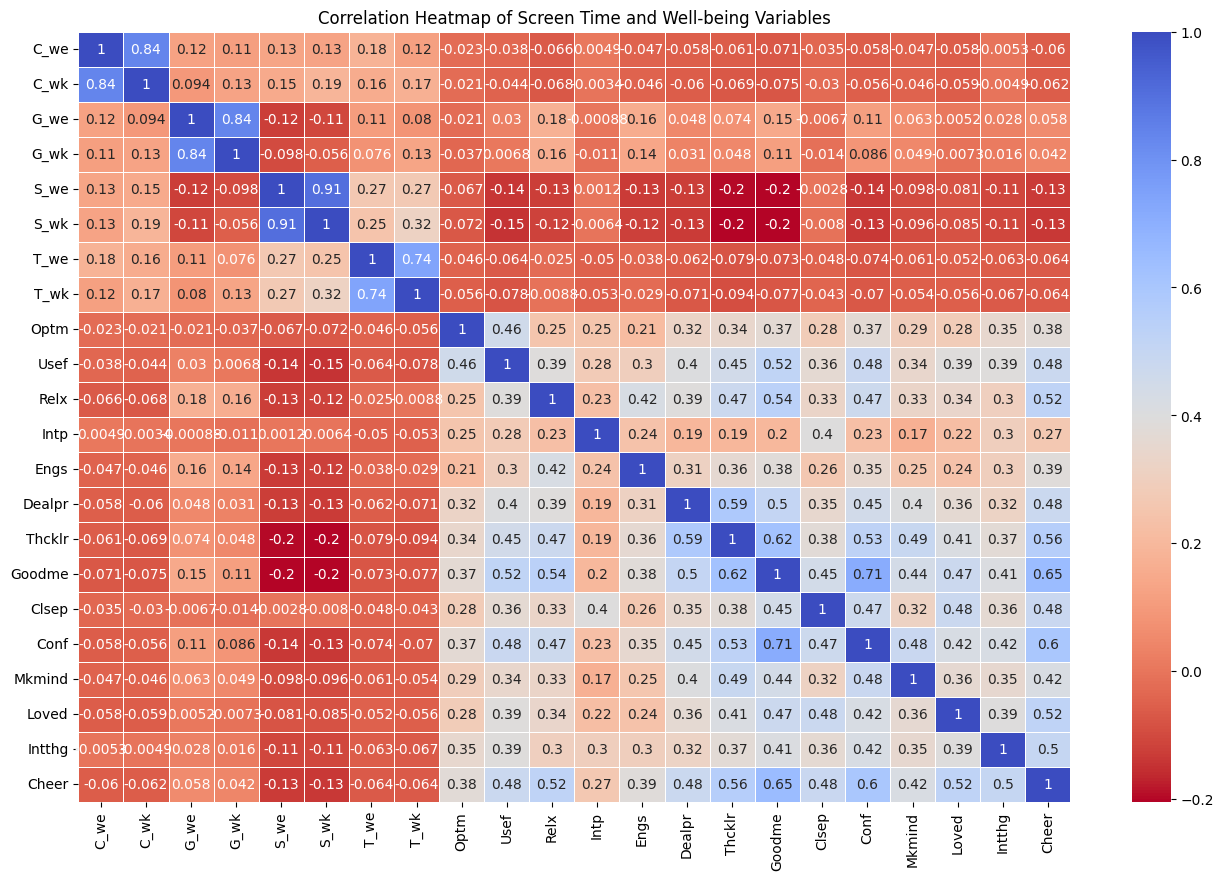
* However, high correlations between weekday and weekend usage (for smartphones, video games, computers, and TV) suggest potential multicollinearity issues in a multiple linear regression model. => Feature engineering to calculate everage daily screentime for each activity
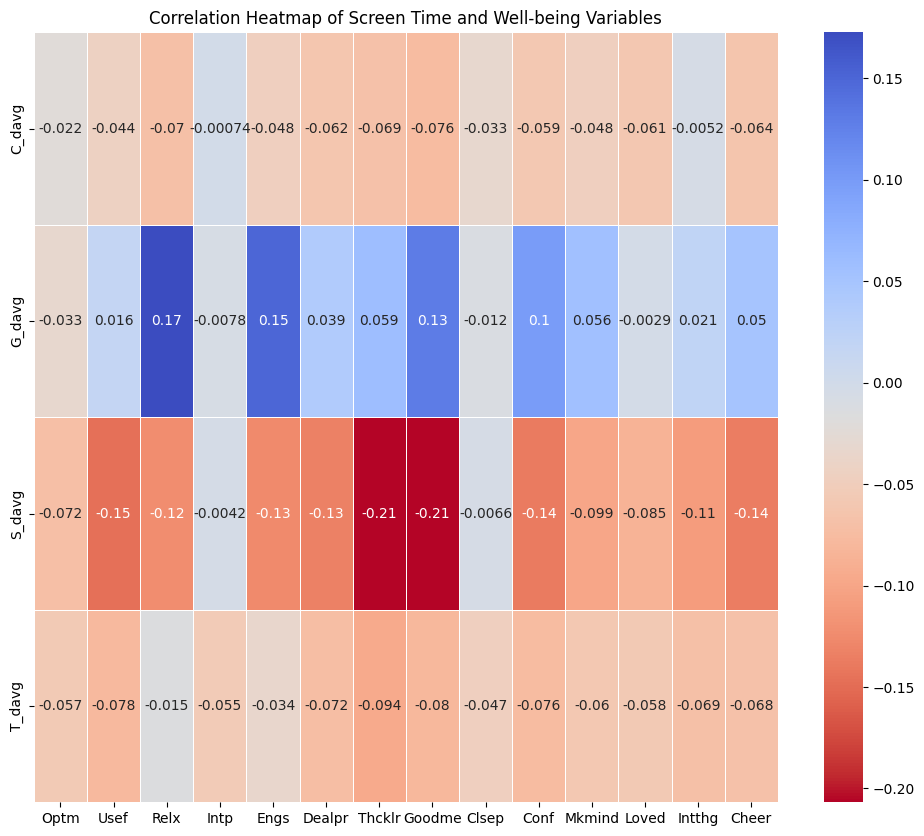

The correlations between the daily average screen time variables (C_davg, G_davg, S_davg, T_davg) and well-being indicators (e.g., Optimism, Confidence, Cheerfulness) are mostly below |0.2|, which indicates weak linear relationships between screen time and well-being. The weak correlations suggest that screen time alone might not explain much of the variability in well-being.
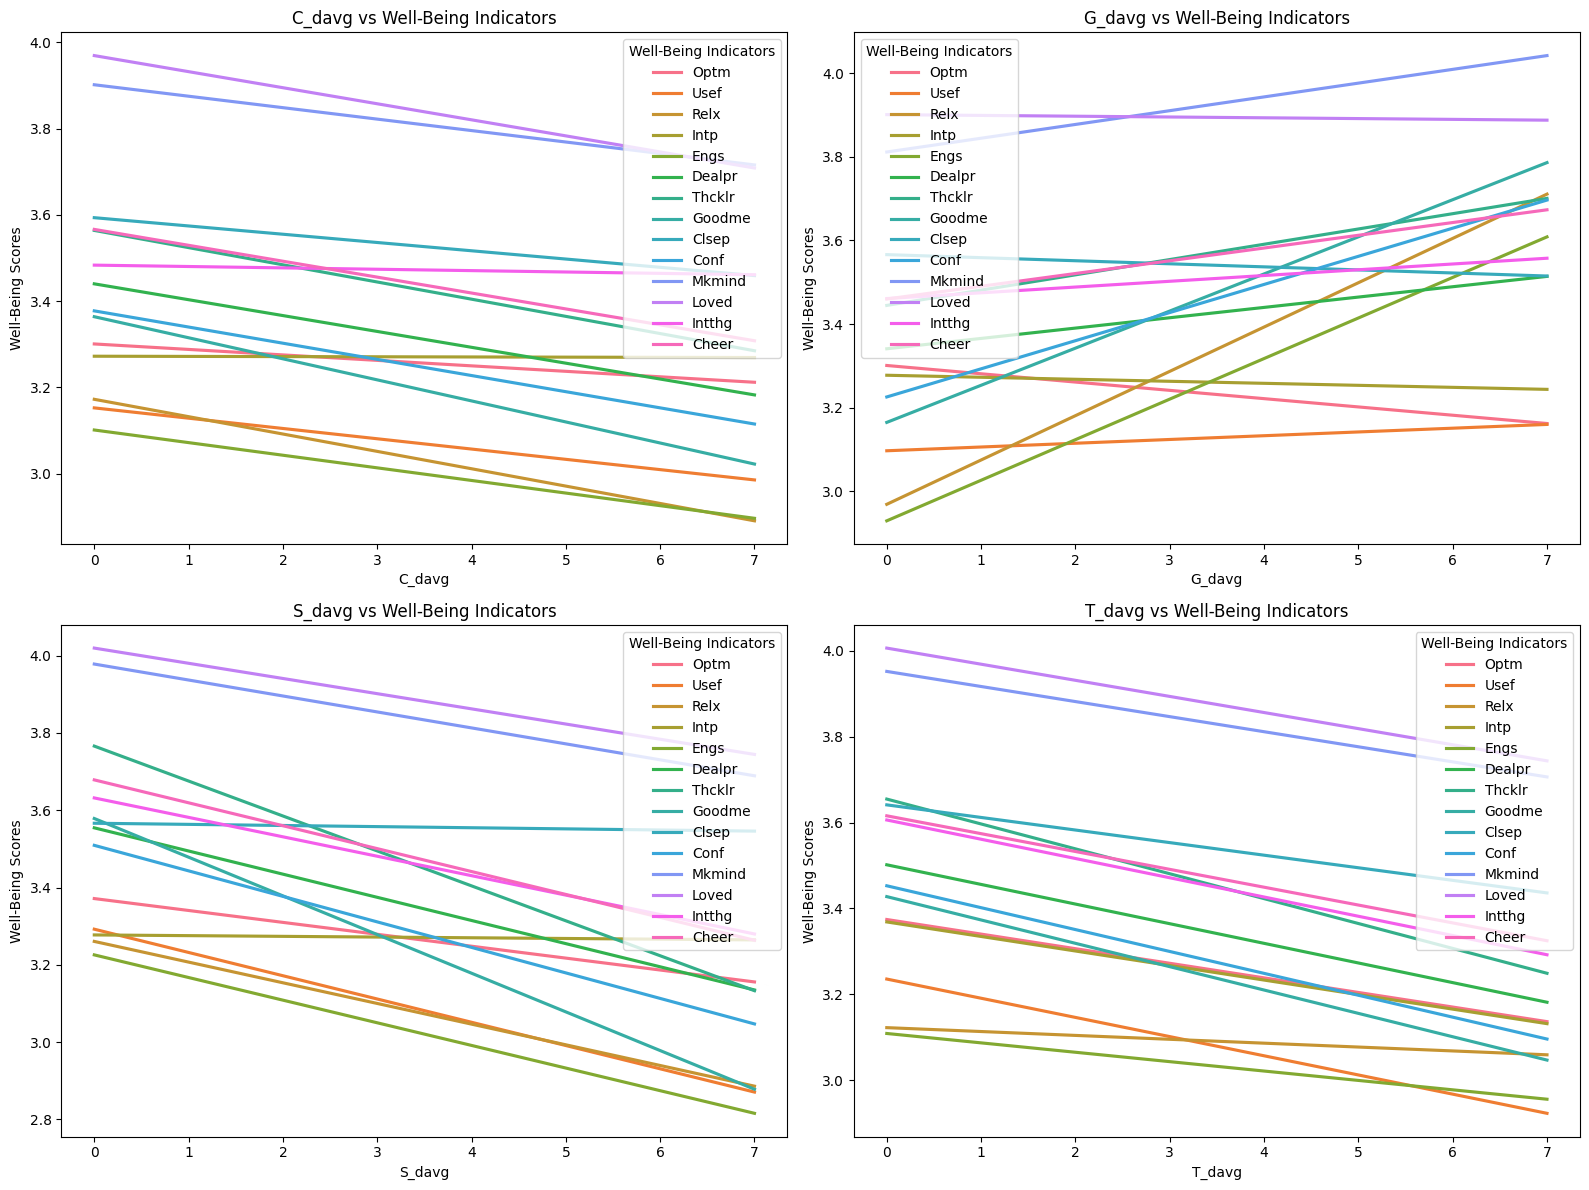
One more heatmap for screentime vs composite well-being
Plotting to see relationships
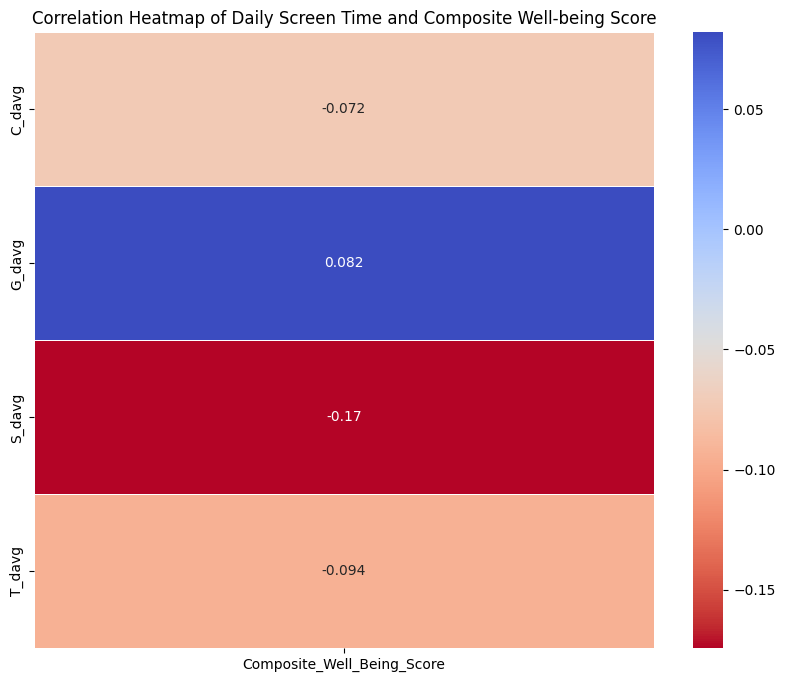



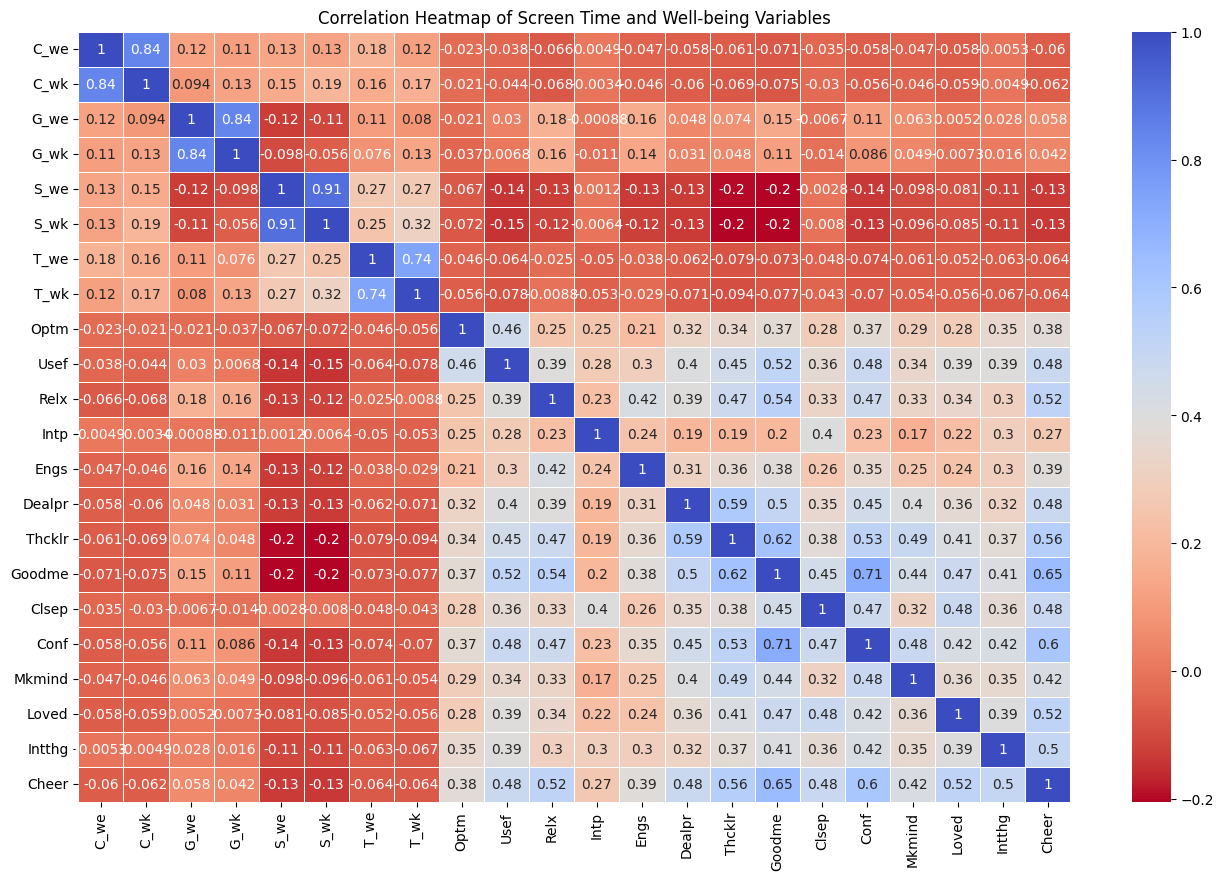

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant well-being and screen time variables for the heatmap
correlation_data = df_merged[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk','Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', linewidths=0.5)

# Set the title
plt.title("Correlation Heatmap of Screen Time and Well-being Variables")

# Display the heatmap
plt.show()


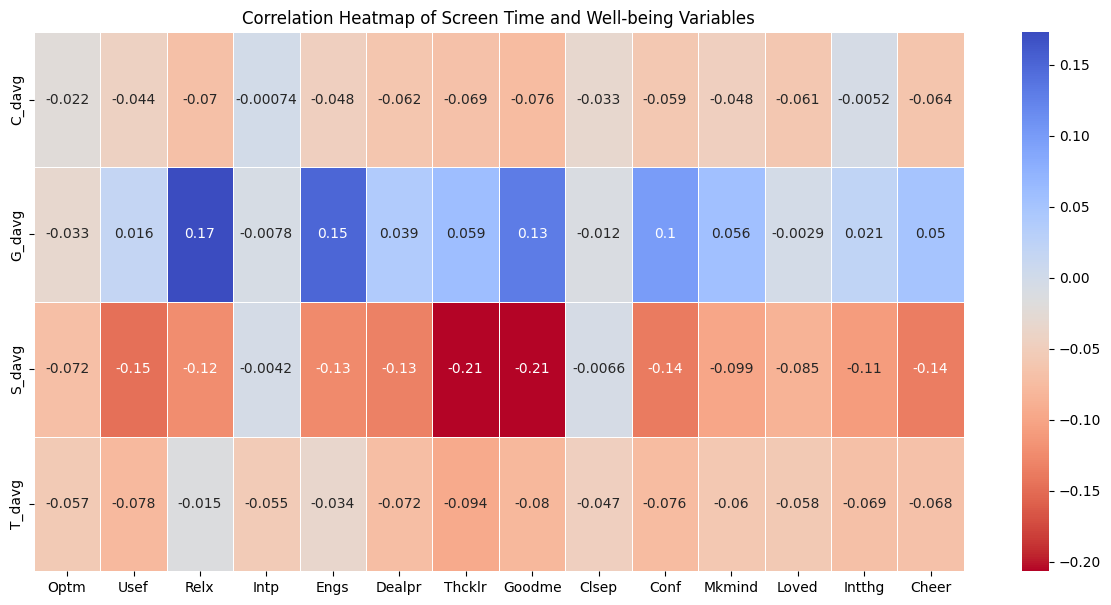

In [7]:
#Calculate Daily Screen time for each Activities
df_merged['C_davg'] = (df_merged['C_we'] * 2 + df_merged['C_wk'] * 5) / 7
df_merged['G_davg'] = (df_merged['G_we'] * 2 + df_merged['G_wk'] * 5) / 7
df_merged['S_davg'] = (df_merged['S_we'] * 2 + df_merged['S_wk'] * 5) / 7
df_merged['T_davg'] = (df_merged['T_we'] * 2 + df_merged['T_wk'] * 5) / 7

# Define the new screen time columns with '_davg' suffix and well-being columns
davg_columns = ['C_davg', 'G_davg', 'S_davg', 'T_davg']  # Screen time variables
well_being_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']  # Well-being variables

# Calculate the correlation matrix between all columns
correlation_data = df_merged[davg_columns + well_being_columns]  # Extract relevant columns
correlation_matrix = correlation_data.corr()

# Extract correlations between daily average screen time and well-being indicators
davg_wellbeing_correlation = correlation_matrix.loc[davg_columns, well_being_columns]

# Plot the heatmap for the subset of screen time and well-being correlations
plt.figure(figsize=(15, 7))
sns.heatmap(davg_wellbeing_correlation, annot=True, cmap='coolwarm_r', linewidths=0.5)

# Set the title
plt.title("Correlation Heatmap of Screen Time and Well-being Variables")

# Display the heatmap
plt.show()


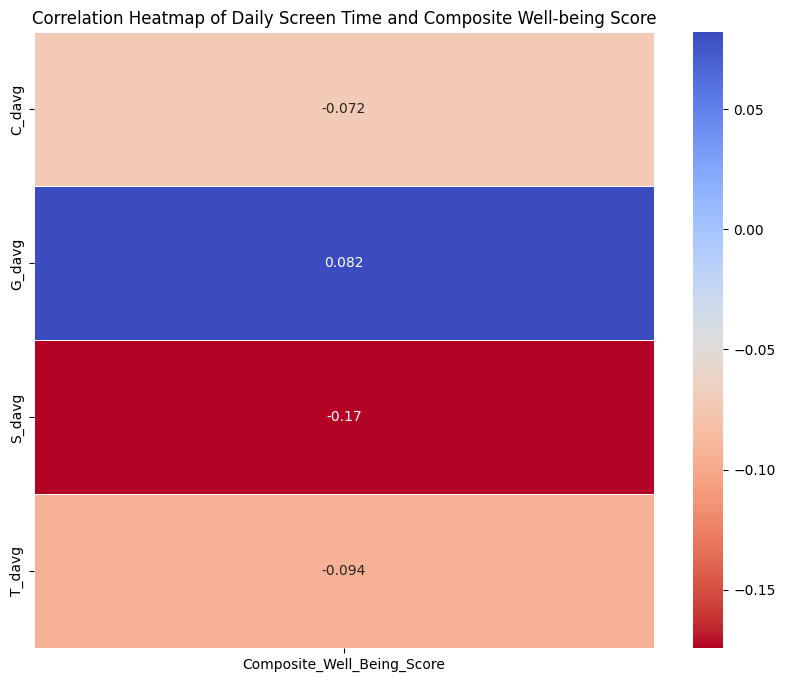

In [8]:
# Create a new column 'Composite Well-being Score' by summing across all well-being columns for each individual
df_merged['Composite_Well_Being_Score'] = df_merged[well_being_columns].mean(axis=1)

# Calculate the correlation matrix between all columns
correlation_data = df_merged[['C_davg', 'G_davg', 'S_davg', 'T_davg','Composite_Well_Being_Score']]  # Extract relevant columns
correlation_matrix = correlation_data.corr()

# Extract correlations between daily average screen time and well-being indicators
davg_wellbeing_correlation = correlation_matrix.loc[davg_columns, 'Composite_Well_Being_Score'].to_frame()

# Plot the heatmap for the subset of screen time and well-being correlations
plt.figure(figsize=(10, 8))
sns.heatmap(davg_wellbeing_correlation, annot=True, cmap='coolwarm_r', linewidths=0.5)

# Set the title
plt.title("Correlation Heatmap of Daily Screen Time and Composite Well-being Score")

# Display the heatmap
plt.show()

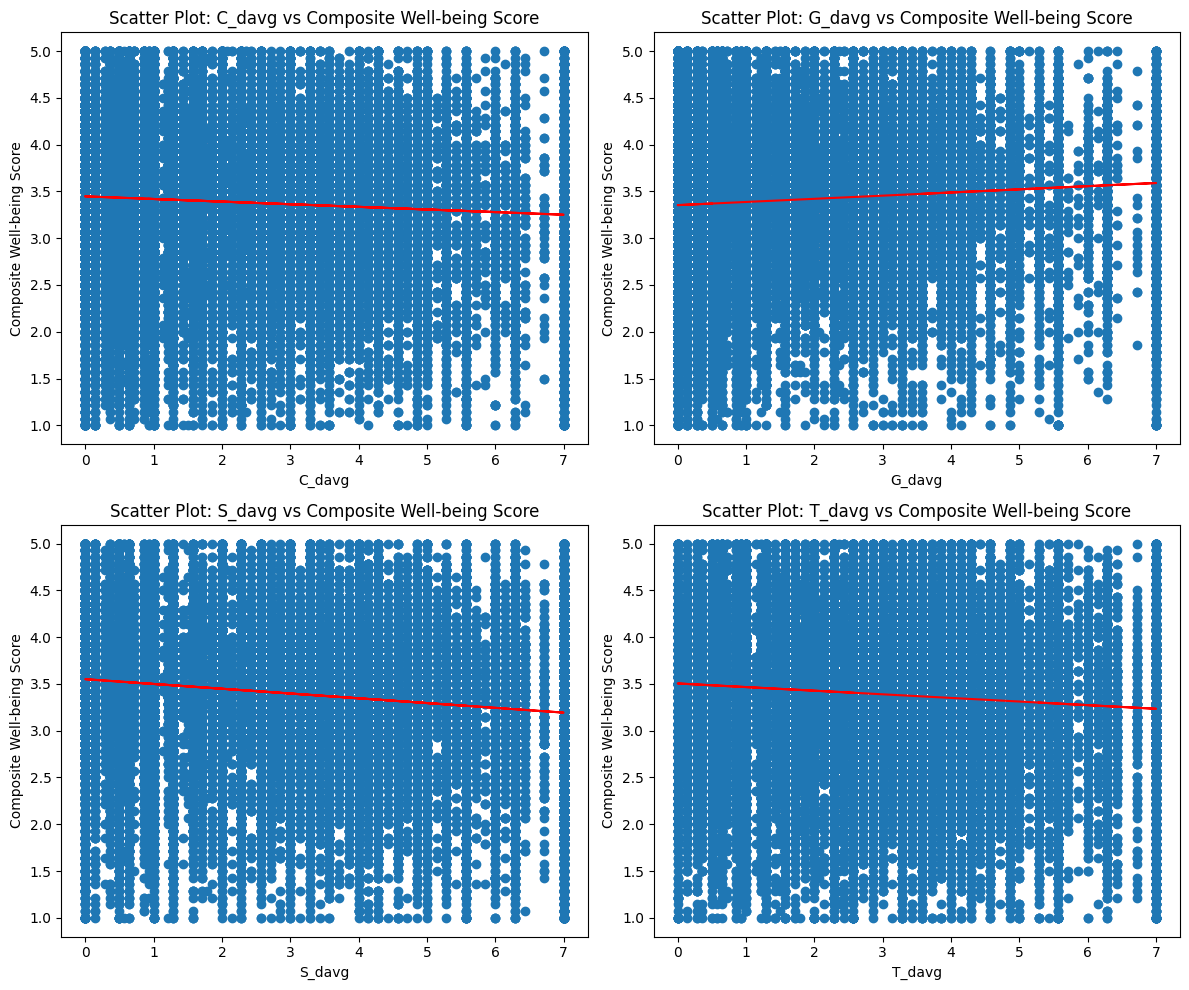

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define screen time variables
screen_time_vars = ['C_davg', 'G_davg', 'S_davg', 'T_davg']

# Define figure and axes for 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Create scatter plots for each screen time variable against Total Well-being Score and add a best-fit line
for i, var in enumerate(screen_time_vars):
    row = i // 2
    col = i % 2
    # Scatter plot
    axs[row, col].scatter(df_merged[var], df_merged['Composite_Well_Being_Score'])

    # Calculate and plot the best fit line
    m, b = np.polyfit(df_merged[var], df_merged['Composite_Well_Being_Score'], 1)  # Fit a 1st-degree polynomial (linear)
    axs[row, col].plot(df_merged[var], m*df_merged[var] + b, color='red')  # Best fit line

    # Set title and labels
    axs[row, col].set_title(f'Scatter Plot: {var} vs Composite Well-being Score')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Composite Well-being Score')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


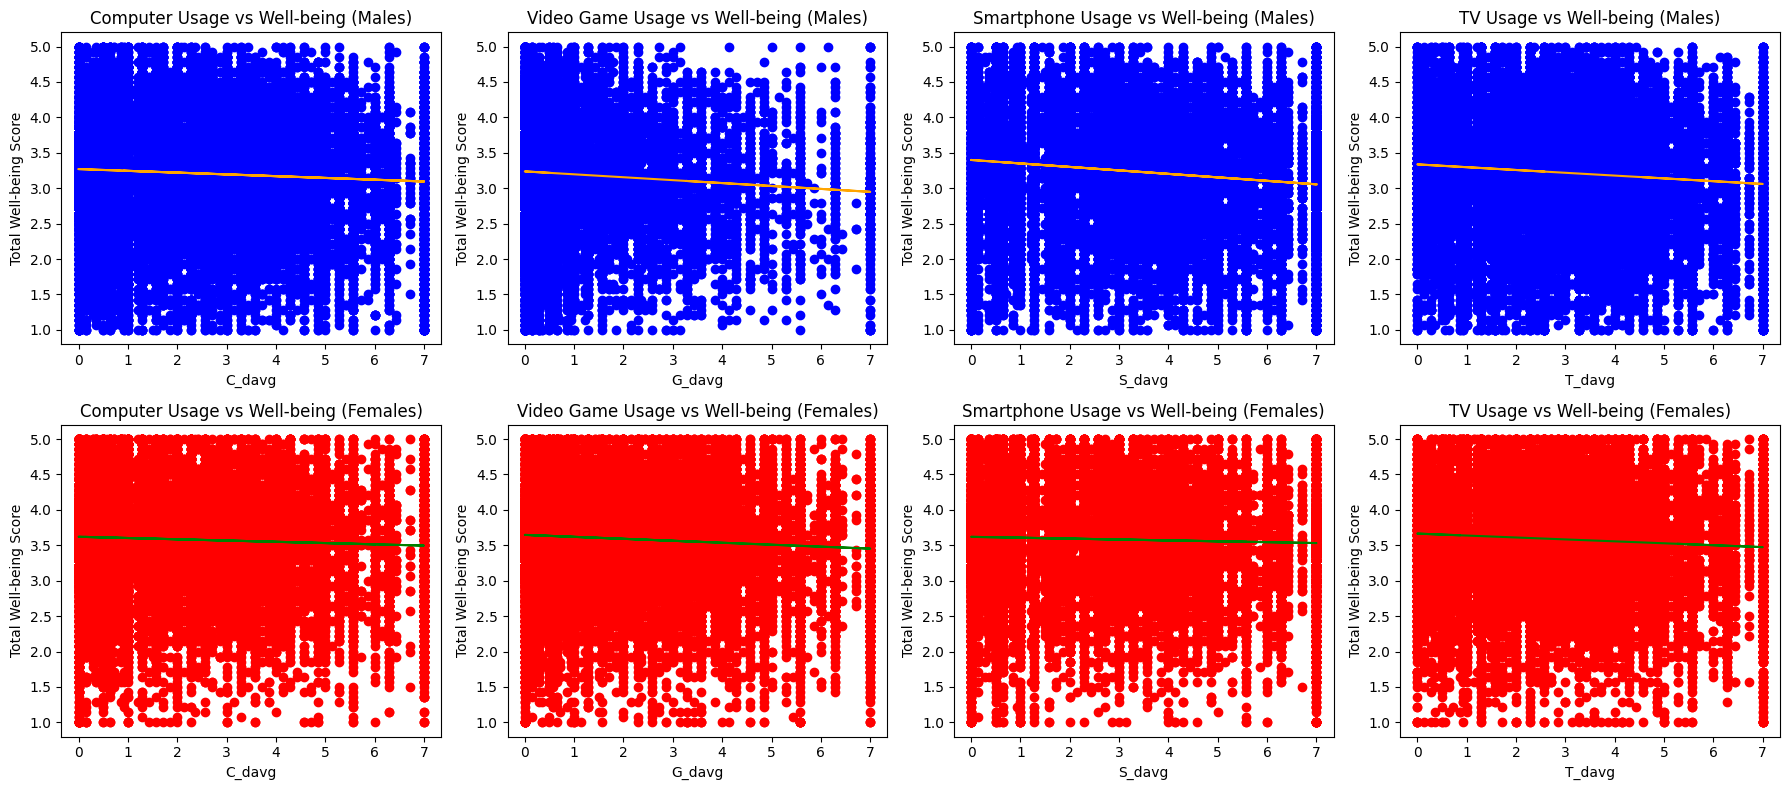

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define screen time variables
screen_time_vars = ['C_davg', 'G_davg', 'S_davg', 'T_davg']
titles = ['Computer Usage', 'Video Game Usage', 'Smartphone Usage', 'TV Usage']

# Subgroup by gender (assuming 0 = Male, 1 = Female)
male_group = df_merged[df_merged['gender'] == 0]
female_group = df_merged[df_merged['gender'] == 1]

# Define figure with 8 subplots (2x4 grid) to handle all screen time variables separately for males and females
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

colors = ['blue', 'red']
line_colors = ['orange', 'green']

# Plot for each screen time variable
for i, var in enumerate(screen_time_vars):
    # Plot for males
    axs[0, i].scatter(male_group[var], male_group['Composite_Well_Being_Score'], color=colors[0], label='Males')
    m, b = np.polyfit(male_group[var], male_group['Composite_Well_Being_Score'], 1)
    axs[0, i].plot(male_group[var], m*male_group[var] + b, color=line_colors[0], label='Best-fit Males')
    axs[0, i].set_title(f'{titles[i]} vs Well-being (Males)')
    axs[0, i].set_xlabel(var)
    axs[0, i].set_ylabel('Total Well-being Score')

    # Plot for females
    axs[1, i].scatter(female_group[var], female_group['Composite_Well_Being_Score'], color=colors[1], label='Females')
    m, b = np.polyfit(female_group[var], female_group['Composite_Well_Being_Score'], 1)
    axs[1, i].plot(female_group[var], m*female_group[var] + b, color=line_colors[1], label='Best-fit Females')
    axs[1, i].set_title(f'{titles[i]} vs Well-being (Females)')
    axs[1, i].set_xlabel(var)
    axs[1, i].set_ylabel('Total Well-being Score')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [11]:
import statsmodels.api as sm

# Independent variables
X = df_merged[['gender','C_davg', 'G_davg', 'S_davg', 'T_davg']]  # Gender and smartphone usage
X = sm.add_constant(X)  # Adds a constant term to the model
# Define the well-being columns
well_being_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Create a new column 'Total Well-being Score' by summing across all well-being columns for each individual
df_merged['Total_Well_Being_Score'] = df_merged[well_being_columns].mean(axis=1)
# Dependent variable (well-being)
y = df_merged['Total_Well_Being_Score']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Total_Well_Being_Score   R-squared:                       0.091
Model:                                OLS   Adj. R-squared:                  0.091
Method:                     Least Squares   F-statistic:                     1959.
Date:                    Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                            05:24:29   Log-Likelihood:                -97022.
No. Observations:                   98278   AIC:                         1.941e+05
Df Residuals:                       98272   BIC:                         1.941e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

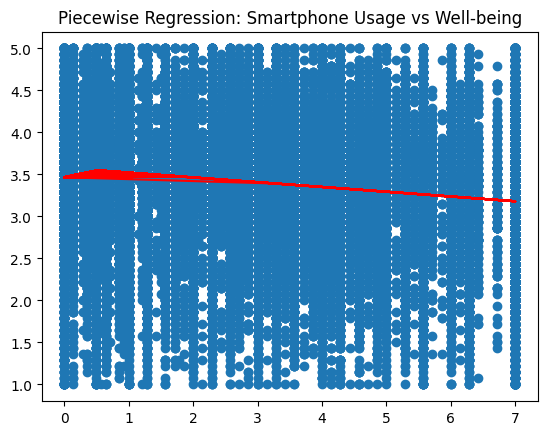

In [ ]:
!pip install pwlf
import pwlf

# Fit piecewise linear regression
X = df_merged['S_davg'].values
y = df_merged['Total_Well_Being_Score'].values
model = pwlf.PiecewiseLinFit(X, y)

# Choose where to add breakpoints
breakpoints = model.fit(2)  # 2 segments (adjust as needed)
y_hat = model.predict(X)

# Plot results
plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.title('Piecewise Regression: Smartphone Usage vs Well-being')
plt.show()


<ipython-input-15-2f4ade9896cd>:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


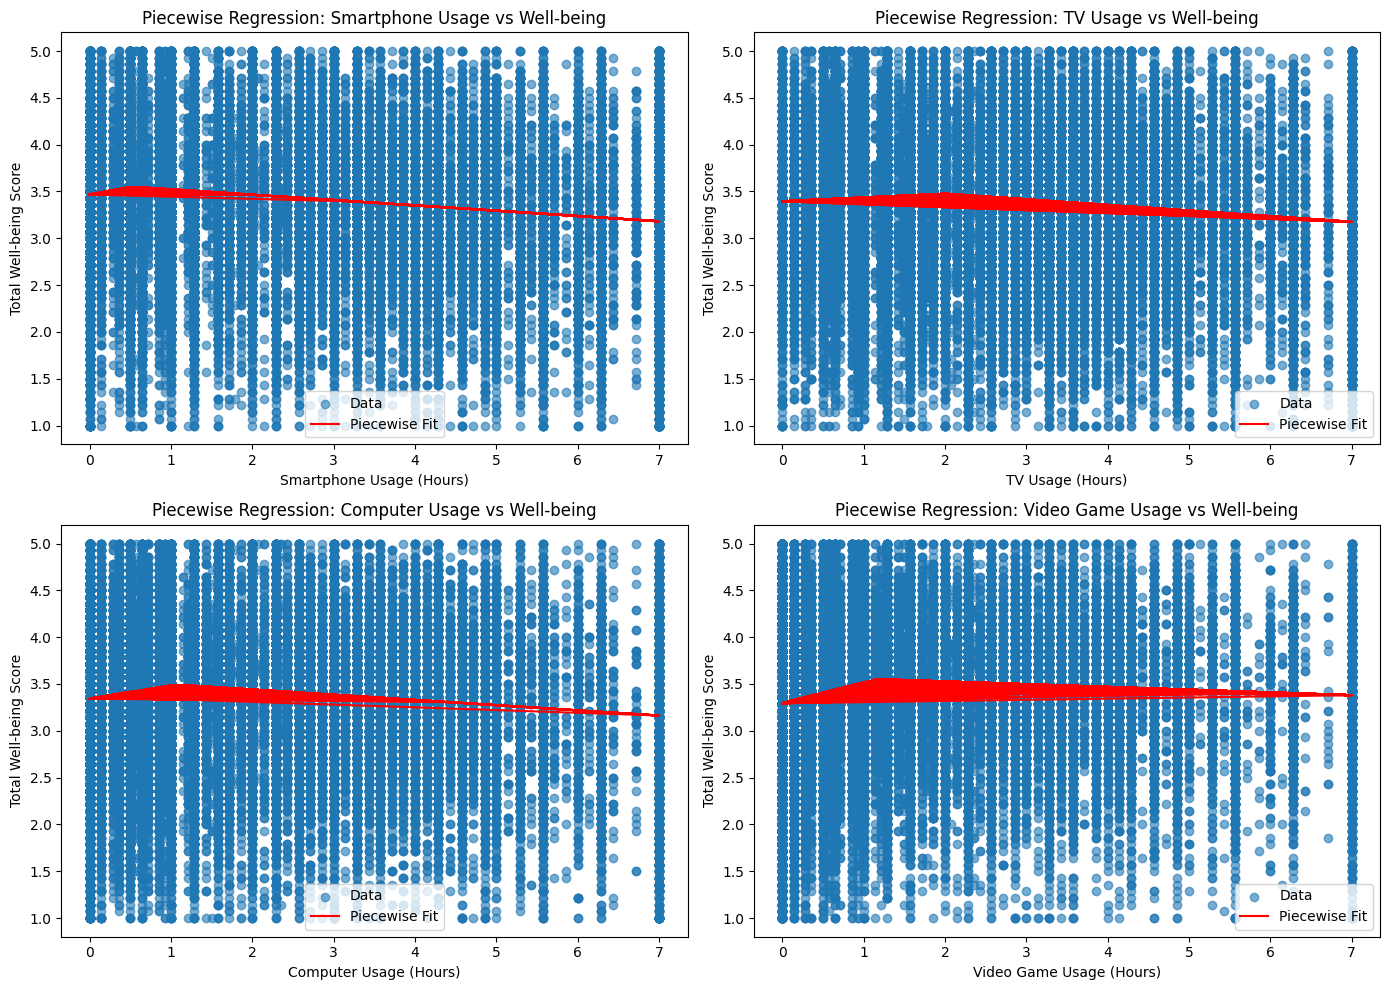

In [ ]:
import pwlf
import matplotlib.pyplot as plt

# Define the screen time variables to analyze
screen_time_vars = ['S_davg', 'T_davg', 'C_davg', 'G_davg']
titles = ['Smartphone Usage', 'TV Usage', 'Computer Usage', 'Video Game Usage']

# Initialize the plot with 2x2 subplots for each screen time variable
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loop over each screen time variable and fit piecewise regression
for i, var in enumerate(screen_time_vars):
    X = df_merged[var].values  # Independent variable (screen time)
    y = df_merged['Total_Well_Being_Score'].values  # Dependent variable (well-being)

    # Fit the piecewise linear model
    model = pwlf.PiecewiseLinFit(X, y)

    # Fit with 2 segments (1 breakpoint)
    breakpoints = model.fit(2)
    y_hat = model.predict(X)

    # Plot each result in its respective subplot
    row = i // 2  # Row index for 2x2 grid
    col = i % 2   # Column index for 2x2 grid
    axs[row, col].scatter(X, y, color='#1f77b4', alpha=0.6, label='Data')  # Change to darker blue
    axs[row, col].plot(X, y_hat, color='red', label='Piecewise Fit')
    axs[row, col].set_title(f'Piecewise Regression: {titles[i]} vs Well-being')
    axs[row, col].set_xlabel(f'{titles[i]} (Hours)')
    axs[row, col].set_ylabel('Total Well-being Score')
    axs[row, col].legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define independent variables (features) and dependent variable (target)
X = df_merged[['S_davg', 'T_davg', 'C_davg', 'G_davg']]  # Example features
y = df_merged['Total_Well_Being_Score']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the well-being scores on the test data
y_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 Score): {r2}')


Mean Absolute Error (MAE): 0.5699876830870518
Mean Squared Error (MSE): 0.5207822593399254
R-squared (R2 Score): -0.1315845595661742


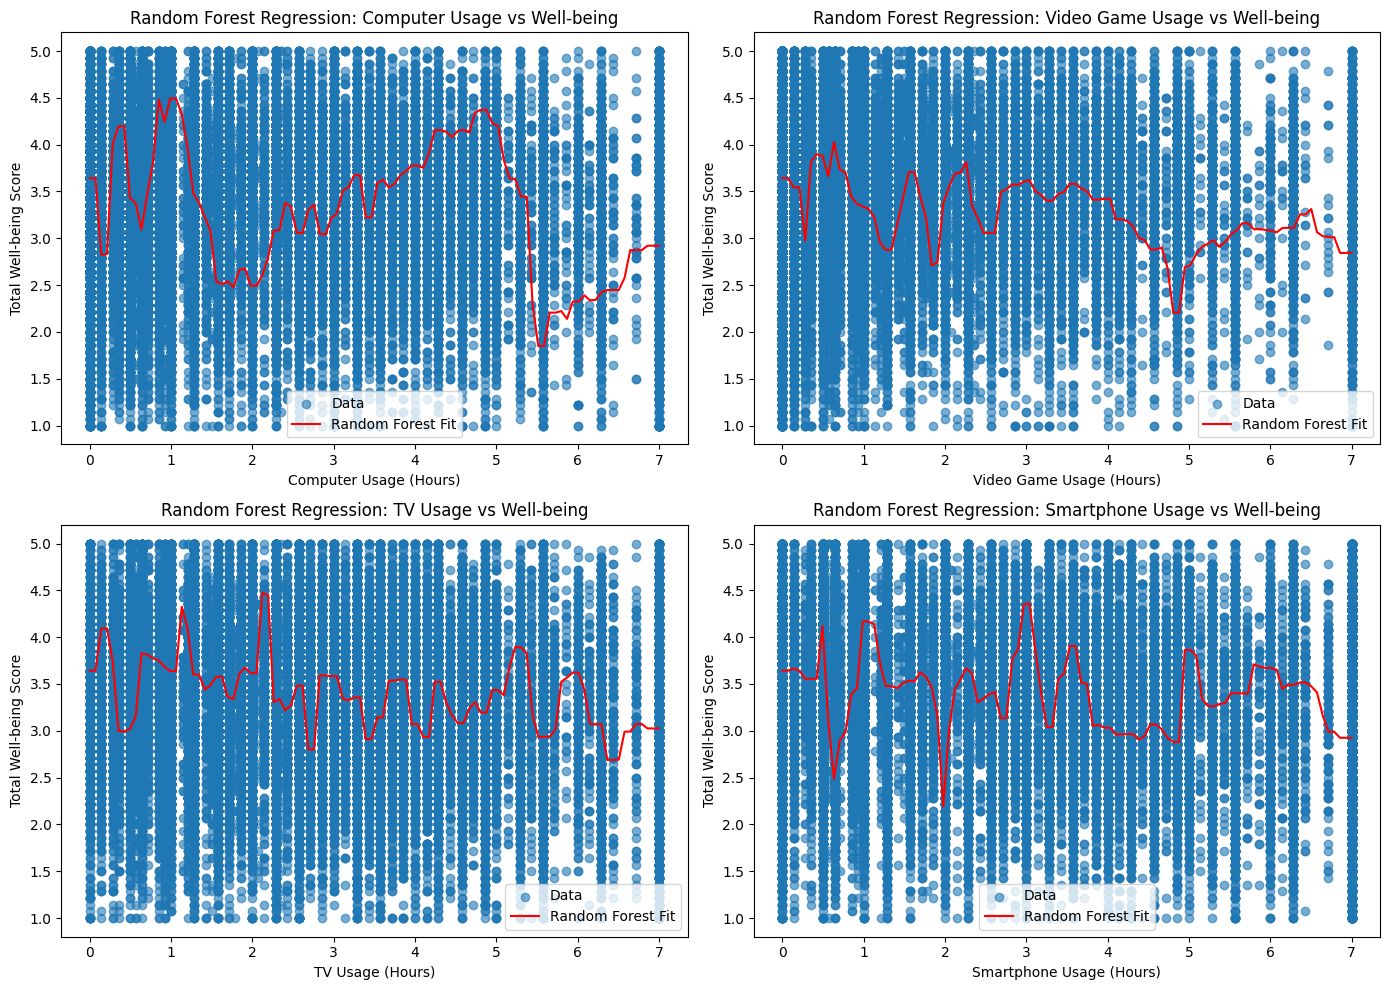

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Define the independent variables (C_davg, G_davg, T_davg, S_davg) and the dependent variable (well-being)
X = df_merged[['C_davg', 'G_davg', 'T_davg', 'S_davg']].values  # Independent variables (screen time types)
y = df_merged['Total_Well_Being_Score'].values  # Dependent variable (well-being)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# For plotting, create test data for the screen time variables
# Using the same min-max range for each variable to plot
X_test = np.linspace(X.min(), X.max(), 100)

# Generate predictions for each screen time variable while keeping the others constant
# You can create a loop for each variable separately

# Initialize subplots to plot the relationships for each variable
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loop over each screen time variable and plot
screen_time_vars = ['C_davg', 'G_davg', 'T_davg', 'S_davg']
titles = ['Computer Usage', 'Video Game Usage', 'TV Usage', 'Smartphone Usage']

for i, var in enumerate(screen_time_vars):
    # Set the specific variable's range for testing
    X_test_range = np.zeros((100, 4))  # Initialize test data with zeros for 4 features
    X_test_range[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)  # Vary the current feature

    # Make predictions based on the model
    y_pred = rf_model.predict(X_test_range)

    # Plot the results
    row = i // 2
    col = i % 2
    axs[row, col].scatter(X[:, i], y, color='#1f77b4', alpha=0.6, label='Data')  # Darker blue scatter
    axs[row, col].plot(np.linspace(X[:, i].min(), X[:, i].max(), 100), y_pred, color='red', label='Random Forest Fit')
    axs[row, col].set_title(f'Random Forest Regression: {titles[i]} vs Well-being')
    axs[row, col].set_xlabel(f'{titles[i]} (Hours)')
    axs[row, col].set_ylabel('Total Well-being Score')
    axs[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 0.5567605969407784
Mean Squared Error (MSE): 0.49842634375386197
R-squared (R2 Score): -0.08300838701333424


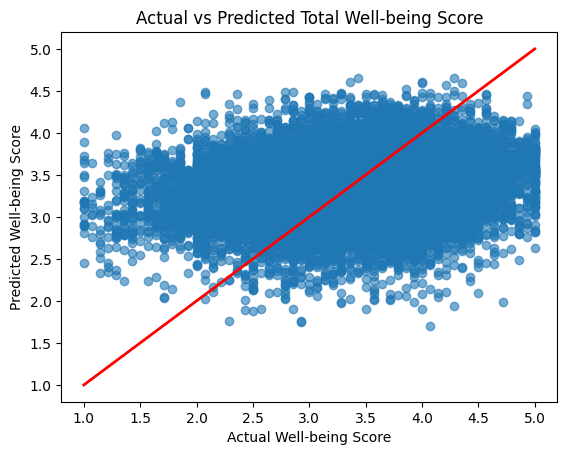

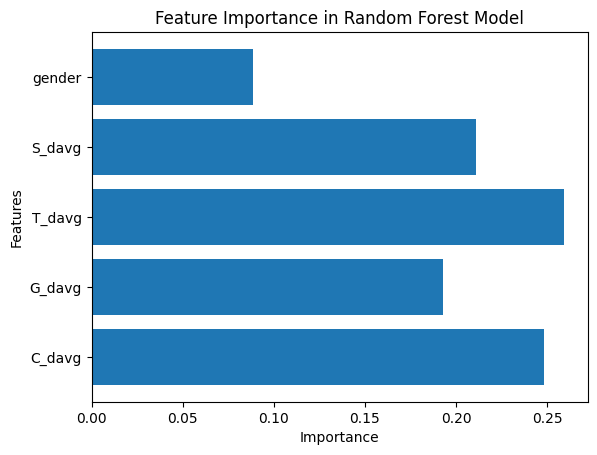

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the independent variables (C_davg, G_davg, T_davg, S_davg) and the dependent variable (Total Well-being Score)
X = df_merged[['C_davg', 'G_davg', 'T_davg', 'S_davg','gender']].values  # Independent variables (screen time variables)
y = df_merged['Total_Well_Being_Score'].values  # Dependent variable (well-being)

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 5: Predict well-being scores on the test data
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 Score): {r2}')

# Step 7: Visualize the actual vs predicted values for the test set
plt.scatter(y_test, y_pred, color='#1f77b4', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Total Well-being Score')
plt.xlabel('Actual Well-being Score')
plt.ylabel('Predicted Well-being Score')
plt.show()

# Step 8: Feature importance visualization (optional)
importances = rf_model.feature_importances_
feature_names = ['C_davg', 'G_davg', 'T_davg', 'S_davg','gender']

# Plot feature importance
plt.barh(feature_names, importances, color='#1f77b4')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


r2_score_test: 0.12302332917174175
r2_score_train: 0.12883340768363372
r2_score_original: 0.12767516425312264


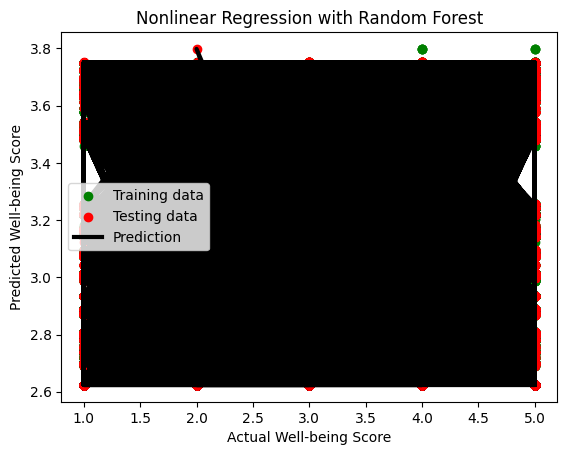

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define your X and y

X = df_merged[['S_davg','gender']].values  # Independent variables
y = df_merged['Goodme'].values  # Dependent variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

########model: Random forest
model_random = RandomForestRegressor(n_estimators=692, max_depth=5)
model_random.fit(X_train, y_train)

########################
# X_new is generated for plotting purposes
# Here, we're generating new values for the screen time range to get predictions
# Note: For multiple features, you can't use linspace for one dimension like in a single variable model.
# So we would use the original X data points for predictions.

y_pred_new = model_random.predict(X_test)  # Predictions on test set for plotting

##############################
y_pred_test = model_random.predict(X_test)
y_pred_train = model_random.predict(X_train)
y_pred_original = model_random.predict(X)

########
# Print the predicted output, R-squared
print('r2_score_test:', r2_score(y_test, y_pred_test))
print('r2_score_train:', r2_score(y_train, y_pred_train))
print('r2_score_original:', r2_score(y, y_pred_original))

####plots
plt.scatter(y_train, y_pred_train, color='green', label='Training data')
plt.scatter(y_test, y_pred_test, color='red', label='Testing data')
plt.plot(y_test, y_pred_new, color='black', linewidth=3, label='Prediction')  # Showing the fitted line
plt.xlabel('Actual Well-being Score')
plt.ylabel('Predicted Well-being Score')
plt.title('Nonlinear Regression with Random Forest')
plt.legend()
plt.show()


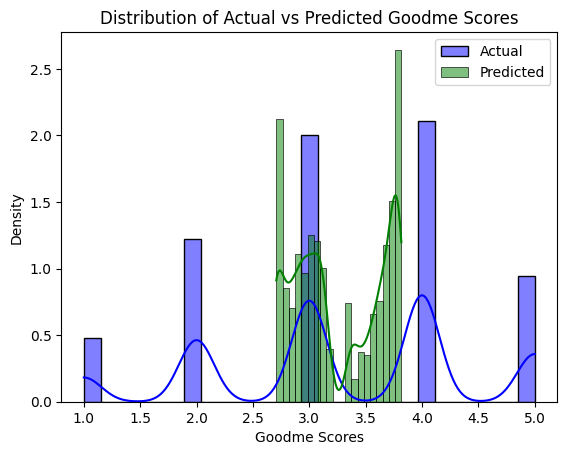

In [ ]:
import seaborn as sns

# Plot the distribution of actual vs predicted values
sns.histplot(y_test, color="blue", label="Actual", kde=True, stat="density")
sns.histplot(y_pred_test, color="green", label="Predicted", kde=True, stat="density")
plt.title('Distribution of Actual vs Predicted Goodme Scores')
plt.xlabel('Goodme Scores')
plt.ylabel('Density')
plt.legend()
plt.show()


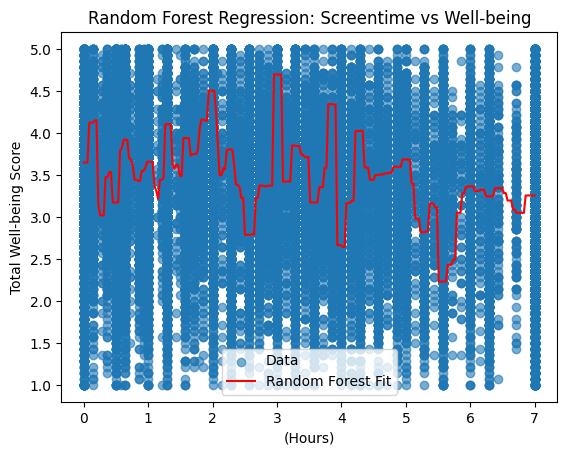

Feature Importances:
[0.23383999 0.29371286 0.27909328 0.19335387]
Model R^2 Score on Training Data:
0.6074896313531204
Mean Squared Error (MSE): 0.18202194711733197
Mean Absolute Error (MAE): 0.3124068215275152


In [16]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for DataFrame manipulation

# Define the independent variable (e.g., S_davg) and dependent variable (well-being)
X = df_merged[['S_davg', 'T_davg', 'C_davg', 'G_davg']]  # Independent variable (screen time)
y = df_merged['Total_Well_Being_Score'].values  # Dependent variable (well-being)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=0)

# Fit the model
rf_model.fit(X, y)

# Generate predictions (Modified to handle multiple features)
num_points = 250
X_test = pd.DataFrame(np.zeros((num_points, 4)), columns=['S_davg', 'T_davg', 'C_davg', 'G_davg'])  # Initialize X_test DataFrame with zeros

# Generate test data for each feature, covering a range of values
for feature in X.columns:
    X_test[feature] = np.linspace(X[feature].min(), X[feature].max(), num_points)

y_pred = rf_model.predict(X_test)

# Assuming you want to plot the prediction against the first feature (S_davg)
plt.scatter(X['S_davg'], y, color='#1f77b4', alpha=0.6, label='Data')
plt.plot(X_test['S_davg'], y_pred, color='red', label='Random Forest Fit')
plt.title('Random Forest Regression: Screentime vs Well-being')
plt.xlabel('(Hours)')
plt.ylabel('Total Well-being Score')
plt.legend()
plt.show()

# Fit the model
rf_model.fit(X, y)

# Print the model's feature importance
print("Feature Importances:")
print(rf_model.feature_importances_)

# Print the model's score (R^2 value on the training data)
print("Model R^2 Score on Training Data:")
print(rf_model.score(X, y))

# Generate predictions for the test data
y_pred = rf_model.predict(X_test)

# If you want to calculate additional metrics like MSE or MAE for model evaluation, you can add those here:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, rf_model.predict(X))
mae = mean_absolute_error(y, rf_model.predict(X))

# Print MSE and MAE
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Note: RandomForestRegressor does not have a built-in summary like statsmodels OLS,
# but the above metrics and feature importances give insight into the model's performance.


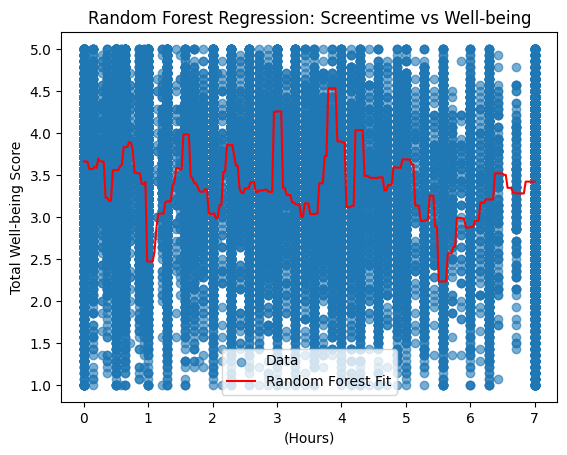

Feature Importances:
[0.2111967  0.256961   0.24425787 0.1967183  0.09086613]
Model R^2 Score on Training Data:
0.6582496412285955
Mean Squared Error (MSE): 0.158482605048279
Mean Absolute Error (MAE): 0.2900535916931961


In [19]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for DataFrame manipulation

# Define the independent variable and dependent variable (well-being)
X = df_merged[['S_davg', 'T_davg', 'C_davg', 'G_davg','gender']]  # Independent variable (screen time)
y = df_merged['Total_Well_Being_Score'].values  # Dependent variable (well-being)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=0)

# Fit the model
rf_model.fit(X, y)

# Generate predictions (Modified to handle multiple features)
num_points = 250
X_test = pd.DataFrame(np.zeros((num_points, 5)), columns=['S_davg', 'T_davg', 'C_davg', 'G_davg','gender'])  # Initialize X_test DataFrame with zeros

# Generate test data for each feature, covering a range of values
for feature in X.columns:
    X_test[feature] = np.linspace(X[feature].min(), X[feature].max(), num_points)

y_pred = rf_model.predict(X_test)

# Assuming you want to plot the prediction against the first feature (S_davg)
plt.scatter(X['S_davg'], y, color='#1f77b4', alpha=0.6, label='Data')
plt.plot(X_test['S_davg'], y_pred, color='red', label='Random Forest Fit')
plt.title('Random Forest Regression: Screentime vs Well-being')
plt.xlabel('(Hours)')
plt.ylabel('Total Well-being Score')
plt.legend()
plt.show()

# Fit the model
rf_model.fit(X, y)

# Print the model's feature importance
print("Feature Importances:")
print(rf_model.feature_importances_)

# Print the model's score (R^2 value on the training data)
print("Model R^2 Score on Training Data:")
print(rf_model.score(X, y))

# Generate predictions for the test data
y_pred = rf_model.predict(X_test)

# If you want to calculate additional metrics like MSE or MAE for model evaluation, you can add those here:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, rf_model.predict(X))
mae = mean_absolute_error(y, rf_model.predict(X))

# Print MSE and MAE
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Note: RandomForestRegressor does not have a built-in summary like statsmodels OLS,
# but the above metrics and feature importances give insight into the model's performance.


Actual vs. Predicted Well-being Scores
      Actual Well-being  Predicted Well-being
0              4.571429              4.299008
1              4.071429              3.191706
2              2.214286              3.397963
3              3.142857              2.884317
4              3.571429              3.068281
...                 ...                   ...
9823           3.857143              3.054502
9824           4.571429              3.111971
9825           4.142857              3.638234
9826           3.857143              3.166574
9827           3.000000              3.577114

[9828 rows x 2 columns]

Mean Squared Error (MSE): 0.5191820695779228
Mean Absolute Error (MAE): 0.5687169476488269
R-squared Score: -0.12466137438119929


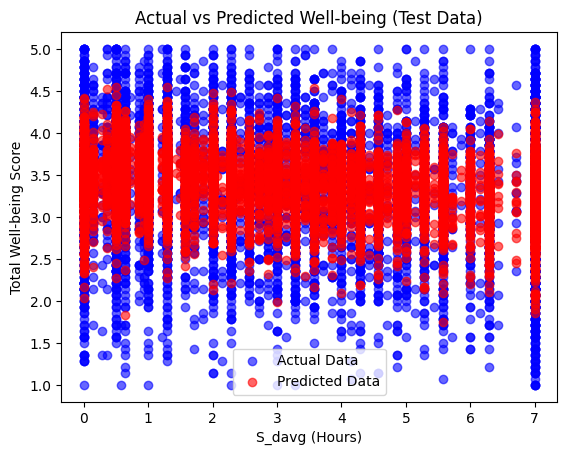

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the independent variable (e.g., S_davg) and dependent variable (well-being)
X = df_merged[['S_davg', 'T_davg', 'C_davg', 'G_davg']]  # Independent variables
y = df_merged['Total_Well_Being_Score'].values  # Dependent variable (well-being)

# Shuffle and split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=0)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the well-being scores for the test data
y_pred = rf_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
results_df = pd.DataFrame({'Actual Well-being': y_test, 'Predicted Well-being': y_pred})

# Print the results table
print("Actual vs. Predicted Well-being Scores")
print(results_df)

# Calculate error metrics for the test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = rf_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2_score}")

# Optionally, display the first few rows of the results table
results_df.head()

# Plot the results
plt.scatter(X_test['S_davg'], y_test, color='blue', alpha=0.6, label='Actual Data')
plt.scatter(X_test['S_davg'], y_pred, color='red', alpha=0.6, label='Predicted Data')
plt.title('Actual vs Predicted Well-being (Test Data)')
plt.xlabel('S_davg (Hours)')
plt.ylabel('Total Well-being Score')
plt.legend()
plt.show()


Actual vs. Predicted Goodme Scores
    Actual Goodme  Predicted Goodme
0               5          3.510412
1               4          3.024045
2               1          2.939502
3               3          3.558418
4               2          2.939502
5               1          3.371517
6               4          3.546785
7               4          3.457334
8               4          3.045809
9               4          3.177504
10              4          3.155461
11              4          3.510412
12              5          2.938918
13              2          3.177504
14              1          2.895724
15              3          3.231485
16              4          3.526345
17              4          3.139817
18              3          3.045809
19              4          3.535611
20              3          2.938918
21              5          3.566621
22              2          3.371517
23              4          3.526345
24              3          3.353214
25              2          3.

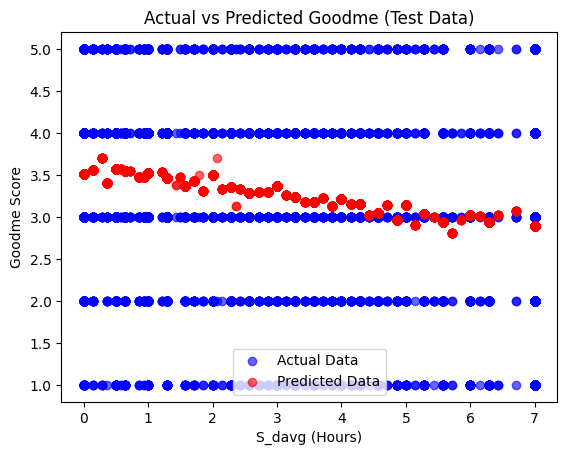

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the independent variable (S_davg) and dependent variable (Goodme)
X = df_merged[['S_davg']]  # Independent variable
y = df_merged['Goodme'].values  # Dependent variable

# Shuffle and split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=0)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the Goodme scores for the test data
y_pred = rf_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
results_df = pd.DataFrame({'Actual Goodme': y_test, 'Predicted Goodme': y_pred})

# Print the results table
print("Actual vs. Predicted Goodme Scores")
print(results_df.head(40))

# Calculate error metrics for the test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = rf_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2_score}")

# Optionally, display the first few rows of the results table
results_df.head(40)

# Plot the results
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data')
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted Data')
plt.title('Actual vs Predicted Goodme (Test Data)')
plt.xlabel('S_davg (Hours)')
plt.ylabel('Goodme Score')
plt.legend()
plt.show()
